In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Loading Data

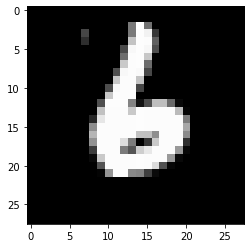

In [2]:
# unpack tuple
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.gray()
plt.imshow(x_train[random.randrange(60000)])

## Normalization

In [3]:
x_train = x_train/255
x_test = x_test/255

## One Hot Encoding
Converting categorial varibles to matrices, so that the ML algorith can do a better job.

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Build the Network

![FCNN](images/fcnn.png)

In [5]:
model = Sequential()
model.add(Flatten())
model.add(Dense(16,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [6]:
from optimizers.adabelief import AdaBeliefOptimizer
opt = AdaBeliefOptimizer()

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.1)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.



In [7]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics=['accuracy'])

## Training

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6568 - accuracy: 0.8063
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2547 - accuracy: 0.9266
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2094 - accuracy: 0.9405
Epoch 4/5
1698/1875 [==========================>...] - ETA: 0s - loss: 0.1820 - accuracy: 0.9470

## Evaluation

In [11]:
# returns a list with two items: loss and metric value, respectively
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 758us/step - loss: 0.1600 - accuracy: 0.9509


[0.15997083485126495, 0.9509000182151794]

In [12]:
# predicting some digits
predictions = model.predict(x_test)

In [13]:
# extract integers
predicted_digits = np.argmax(predictions, axis=1)
random_choice = random.randrange(10000)
one_sample = x_test[random_choice]
predicted_digit = predicted_digits[random_choice]
true_digit = np.argmax(y_test, axis=1)[random_choice]

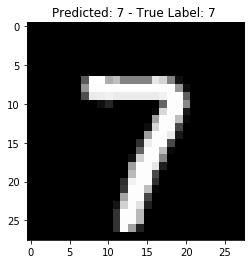

In [14]:
plt.gray()
plt.title('Predicted: %s - True Label: %s ' % (predicted_digit, true_digit))
plt.imshow(x_test[random_choice])